In [20]:
import os
import numpy as np
from astropy.io import fits
from linetools.spectra.xspectrum1d import XSpectrum1D

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
%matplotlib inline
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \usepackage{bm} \usepackage{physics}']
%config InlineBackend.figure_format = 'retina' # For high quality figures

In [21]:
data_folder = "../data-2019-09-25-shane-joey-alex-arcelia"

In [22]:
OVERWRITE = True

## Load the arc spectrum

In [23]:
# Load the data and headers
arc_fname = os.path.join(data_folder, 'masters/arcs_combined.fits')
arc_spec, arc_header = fits.getdata(arc_fname, header=True)

In [24]:
# Median across rows (median flux at each wavelength)
row_num  = np.arange(arc_spec.shape[0])
arc_fl  = np.median(arc_spec, axis=1)

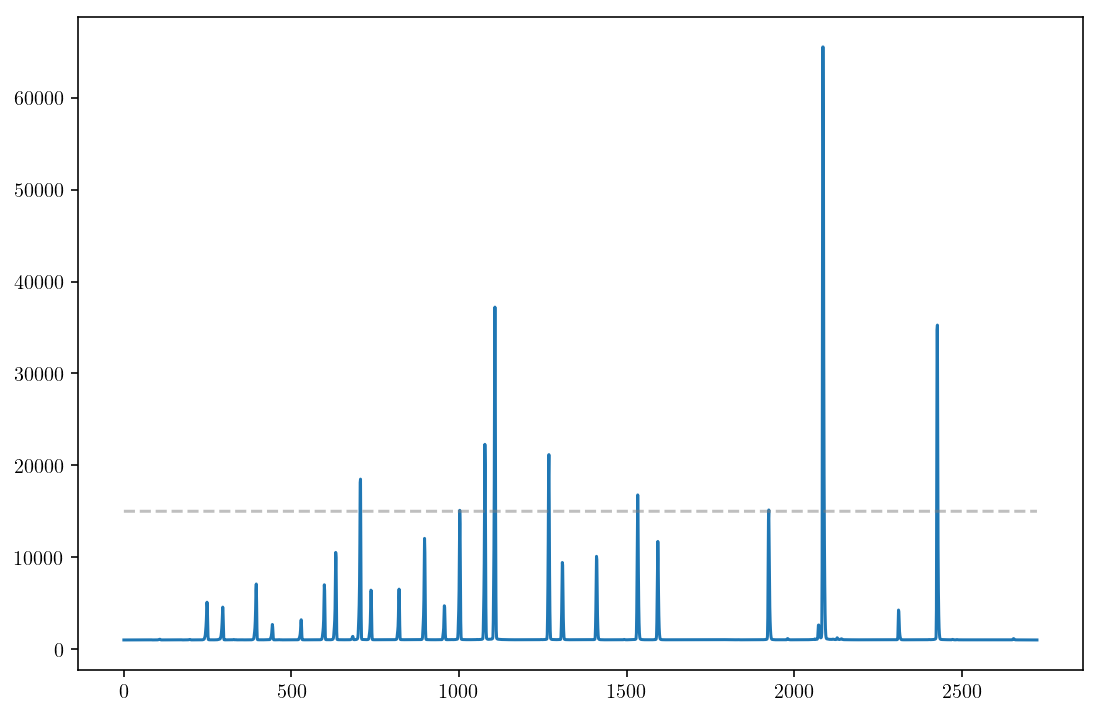

In [28]:
# Take a quick look
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(row_num, arc_fl)
height = 15e3
ax.plot(row_num, height * np.ones(row_num.shape[0]), '--', color='gray', alpha=0.5)
plt.show()

## Find arc lines by pixel

In [29]:
from scipy.signal import find_peaks

In [31]:
peak_inds = find_peaks(arc_fl, height=height)[0]
print(peak_inds)

[ 706 1002 1077 1107 1268 1533 1924 2085 2427]


## Match the peaks at the pixels above to the arc lamp spectrum
Here: https://mthamilton.ucolick.org/techdocs/instruments/kast/images/Kastred1200NeAr_maxtilt.jpg

In [32]:
# True wls corresponding to the peaks of the indices above^^
true_wls = np.array([6143.062, 6334.428, 6382.991, 6402.246, 6506.528, 6678.276, 6929.468, 7032.413, 7245.167])

x = np.copy(peak_inds)
y = np.copy(true_wls)

## Fit a polynomial to the pixel vs wavelength data

In [164]:
z

array([-7.86367666e-09,  2.90515525e-05,  6.13079826e-01,  5.69864405e+03])

In [43]:
deg = 3
z  = np.polyfit(x, y, deg)
p  = np.poly1d(z)

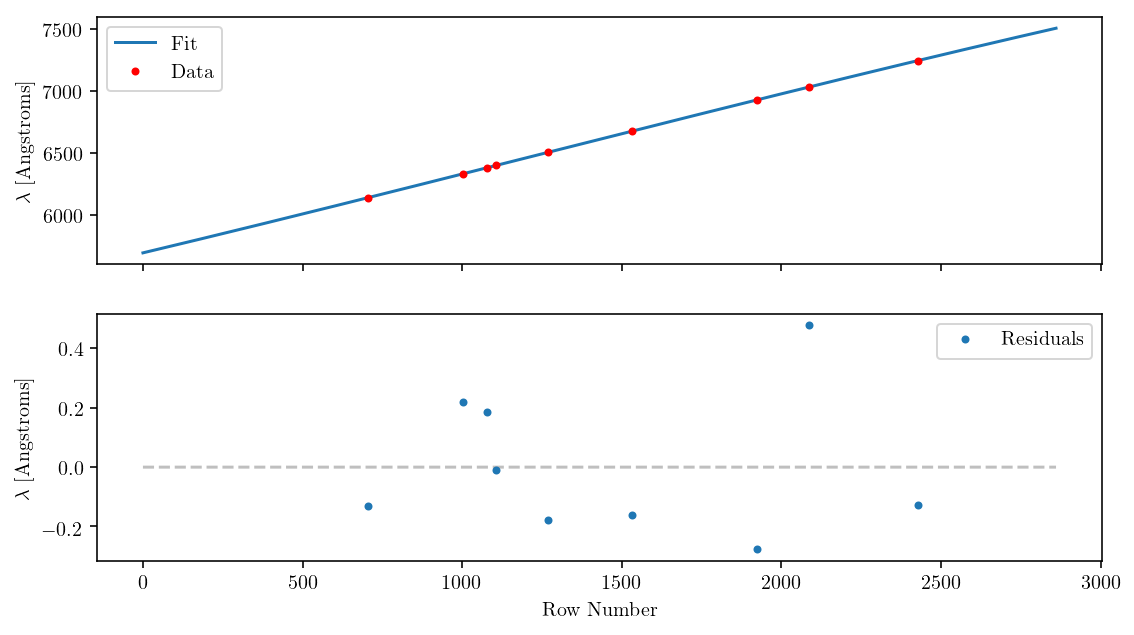

In [44]:
fig, axes = plt.subplots(nrows=2, figsize=(9,5), sharex=True)
ax0, ax1 = axes.flatten()

x_grid = np.linspace(0.95 * np.min(row_num), 1.05 * np.max(row_num), 2000)

ax0.plot(x_grid, p(x_grid), label='Fit')
ax0.plot(x, y, '.r', label='Data')

ax1.plot(x_grid, np.zeros(x_grid.shape[0]), '--', color='gray', alpha=0.5)
ax1.plot(x, y - p(x), '.', label='Residuals')

ax0.legend()
ax1.legend()
ax0.set_ylabel(r'$\lambda$ [Angstroms]')
ax1.set_ylabel(r'$\lambda$ [Angstroms]')
ax1.set_xlabel('Row Number')

plt.show()

In [165]:
# Save the wavelength solution object
np.save(os.path.join('..', os.path.join(data_folder, 'wl_func_coeffs.npy')), z)

In [160]:
# Convert row numbers to wavelengths
wl = p(row_num)
np.save(os.path.join('..', os.path.join(data_folder, 'wl.npy')), wl) # Save the wavelength solution